<a href="https://colab.research.google.com/github/pravin-raut/MachineLearning/blob/Master/Clustering/Clustering_Analayis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
from scipy.spatial.distance import cdist
import urllib.request

%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}


## Loading Data

In [29]:


url = 'https://raw.githubusercontent.com/pravin-raut/MachineLearning/Master/dataset/cluster_data.npy'
local_file_path = 'cluster_data.npy'

# Download the file
urllib.request.urlretrieve(url, local_file_path)

# Load the file using np.load()
data = np.load(local_file_path)

# Now you can use the 'data' variable for further processing


In [30]:
data.shape

(2309, 2)

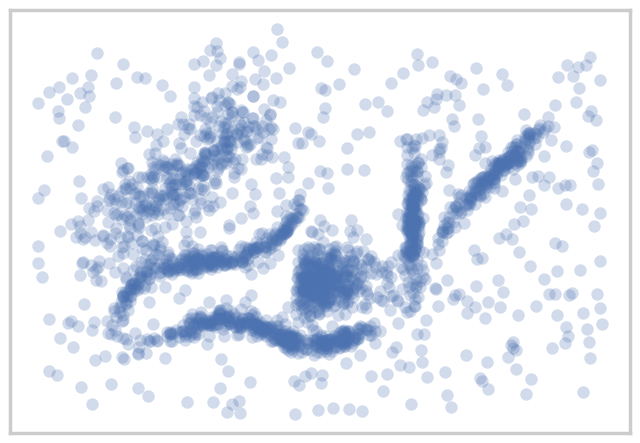

In [31]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)


## Plot Cluster Function

In [32]:
def plot_clusters_og(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    #plt.title('Clusters found by {} in {:.2f} s'.format(str(algorithm.__name__),(end_time - start_time)), fontsize=24)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.2, 0.9, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
    plt.text(-0.55, 0.84, 'param: {}'.format(kwds), fontsize=14)



## **1.KMeans**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

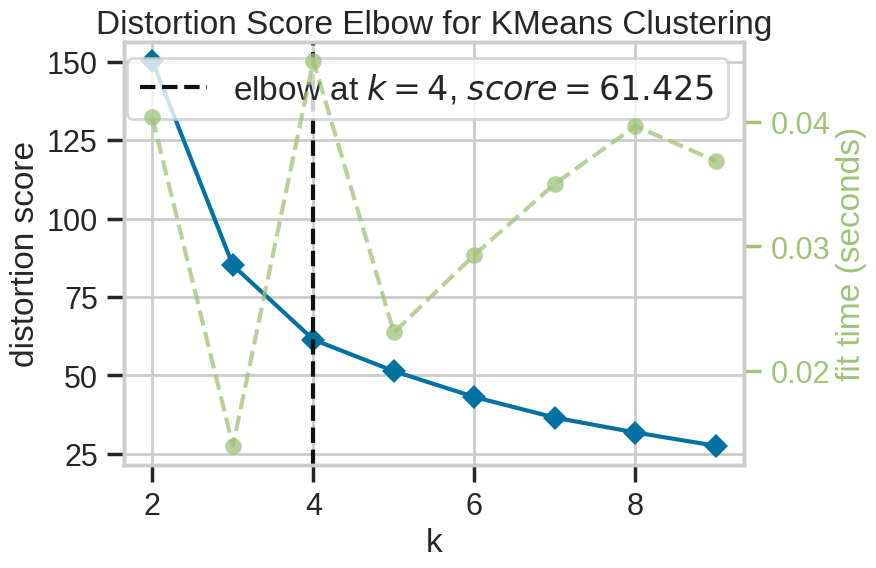

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))

visualizer.fit(data)
visualizer.show()


In [34]:
kmeans_params_list = [
    {'n_clusters': 6, 'init': 'k-means++', 'random_state': 42},
    {'n_clusters': 6, 'init': 'random', 'random_state': 42},
    {'n_clusters': 6, 'init': 'random', 'random_state': 30},
    {'n_clusters': 6, 'init': 'k-means++', 'random_state': 30}
]

Running KMeans with params: {'n_clusters': 6, 'init': 'k-means++', 'random_state': 42}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


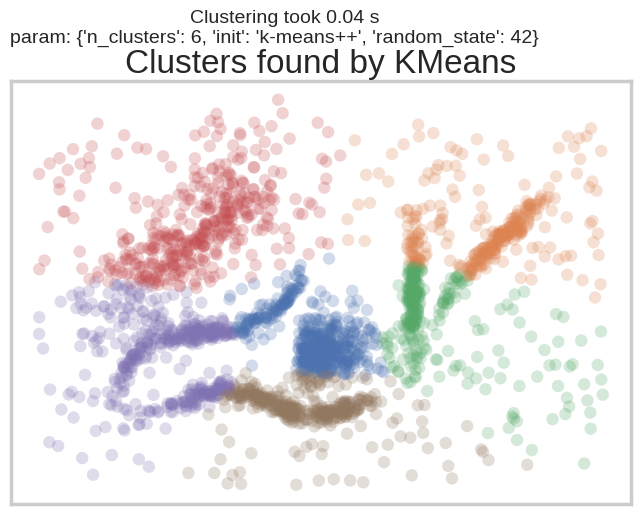

Running KMeans with params: {'n_clusters': 6, 'init': 'random', 'random_state': 42}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


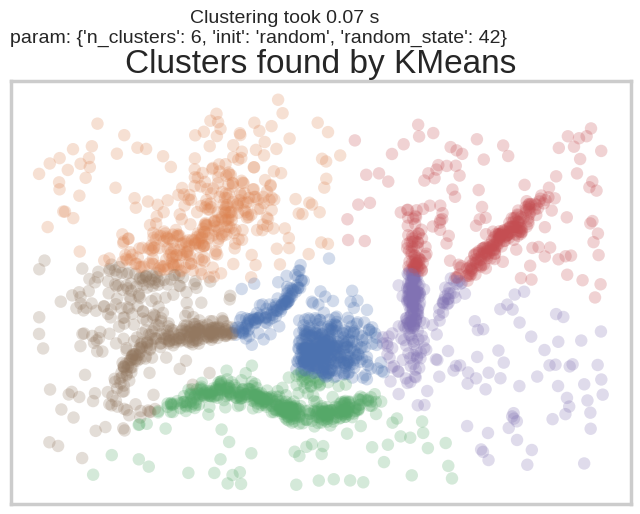

Running KMeans with params: {'n_clusters': 6, 'init': 'random', 'random_state': 30}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


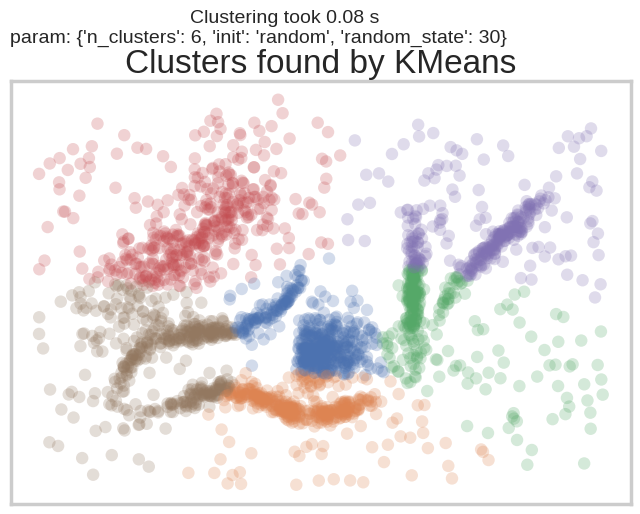

Running KMeans with params: {'n_clusters': 6, 'init': 'k-means++', 'random_state': 30}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


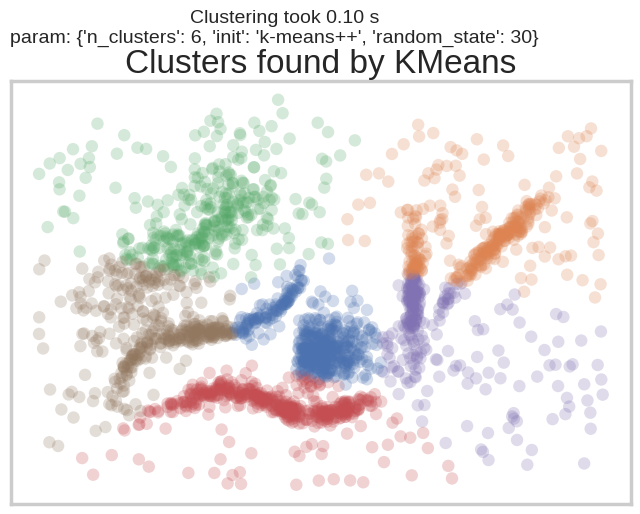

In [35]:
for kmeans_params in kmeans_params_list:
    print(f"Running KMeans with params: {kmeans_params}")
    plot_clusters_og(data, cluster.KMeans, (), kmeans_params)
    plt.show()

## 2.Affinity Propagation

In [36]:
ap_params_list = [
    {'damping': 0.95,'preference':-7.0,'affinity':'euclidean','random_state':42},
{'damping': 0.90,'preference':-6.0,'affinity':'euclidean','random_state':42},
{'damping': 0.85,'preference':-5.0,'affinity':'euclidean','random_state':42},
{'damping': 0.80,'preference':-4.0,'affinity':'euclidean','random_state':42},

]

Running Affinity Propagation with params: {'damping': 0.95, 'preference': -7.0, 'affinity': 'euclidean', 'random_state': 42}


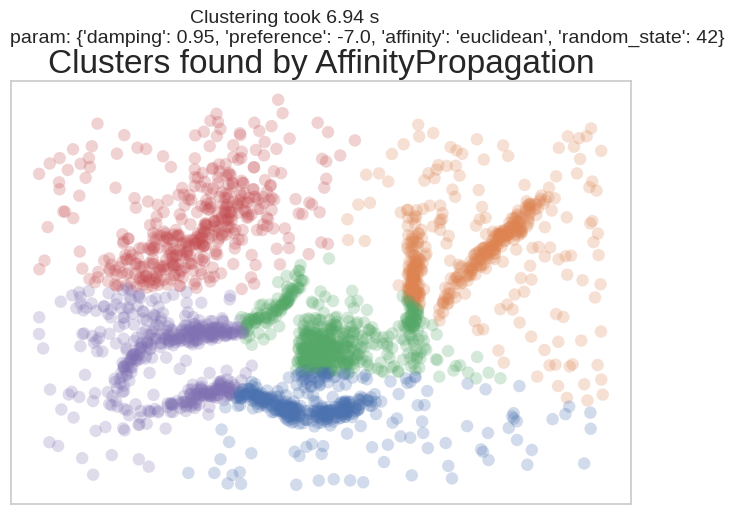

Running Affinity Propagation with params: {'damping': 0.9, 'preference': -6.0, 'affinity': 'euclidean', 'random_state': 42}


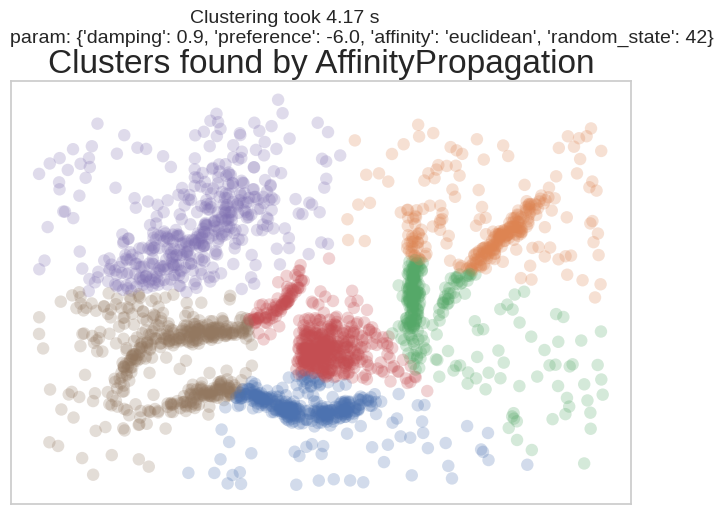

Running Affinity Propagation with params: {'damping': 0.85, 'preference': -5.0, 'affinity': 'euclidean', 'random_state': 42}


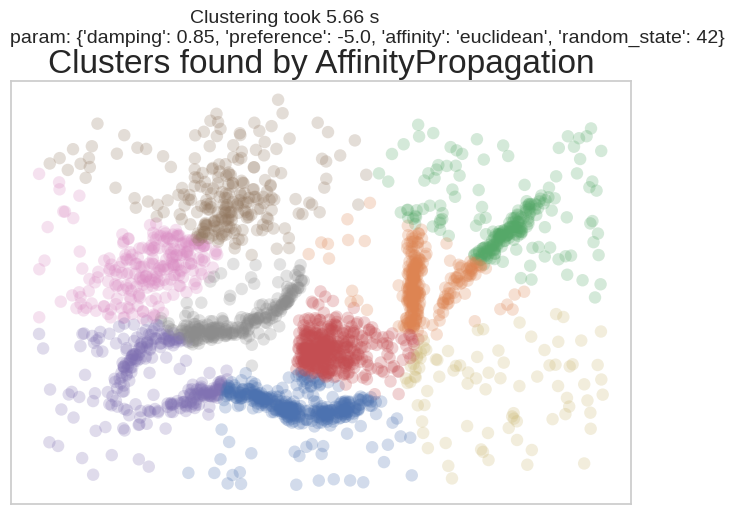

Running Affinity Propagation with params: {'damping': 0.8, 'preference': -4.0, 'affinity': 'euclidean', 'random_state': 42}


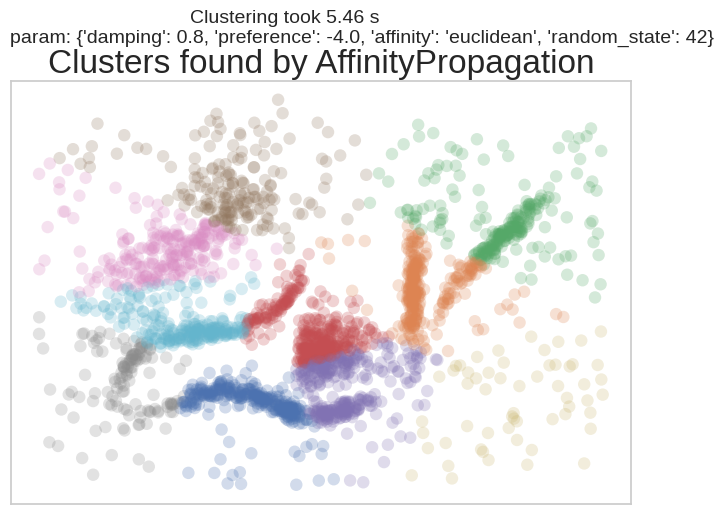

In [16]:
for ap_params in ap_params_list:
    print(f"Running Affinity Propagation with params: {ap_params}")
    plot_clusters_og(data, cluster.AffinityPropagation, (), ap_params)
    plt.show()

## **3.Mean Shift**

In [17]:
ms_params_list = [
    {'bandwidth': 0.20, 'n_jobs': -1,'bin_seeding':True},
    {'bandwidth': 0.20, 'n_jobs': -1,'bin_seeding':False},
    {'bandwidth': 0.25, 'n_jobs': -1,'bin_seeding':True},
    {'bandwidth': 0.15, 'n_jobs': -1,'bin_seeding':True}

  ]

Running Mean Shift with params: {'bandwidth': 0.2, 'n_jobs': -1, 'bin_seeding': True}


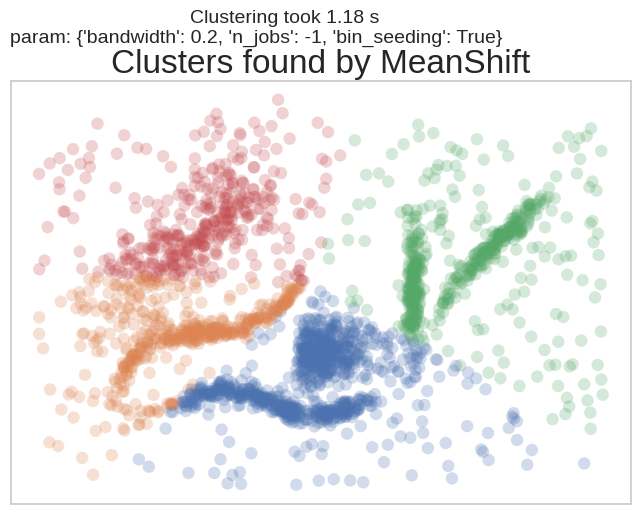

Running Mean Shift with params: {'bandwidth': 0.2, 'n_jobs': -1, 'bin_seeding': False}


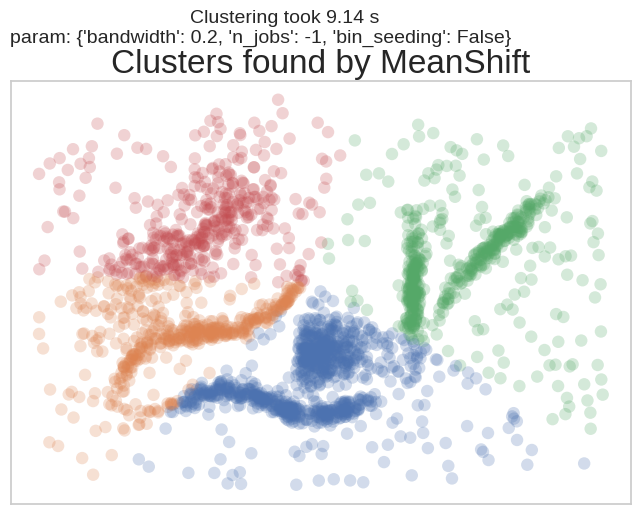

Running Mean Shift with params: {'bandwidth': 0.25, 'n_jobs': -1, 'bin_seeding': True}


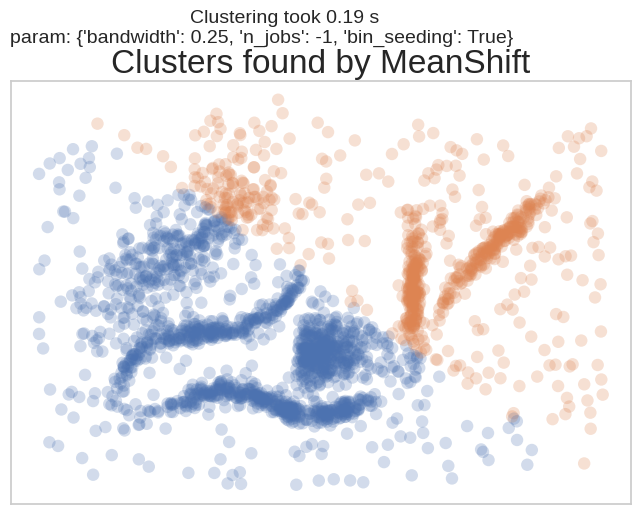

Running Mean Shift with params: {'bandwidth': 0.15, 'n_jobs': -1, 'bin_seeding': True}


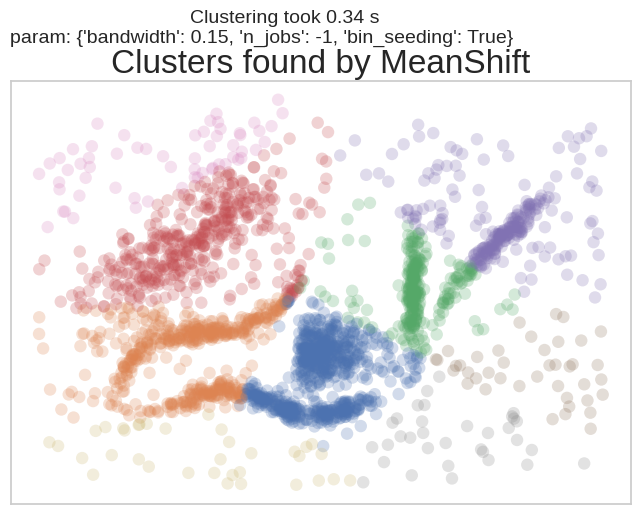

In [18]:
for ms_params in ms_params_list:
    print(f"Running Mean Shift with params: {ms_params}")
    plot_clusters_og(data, cluster.MeanShift, (), ms_params)
    plt.show()

## **4.SpectralClustering**

In [19]:
!pip install pyamg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.0 MB/s eta 0:00:00


In [20]:
spectral_params_list = [
    {'n_clusters': 6, 'affinity': 'nearest_neighbors', 'eigen_solver': 'arpack', 'random_state': 42, 'n_jobs': -1},
    {'n_clusters': 6, 'affinity': 'rbf', 'eigen_solver': 'lobpcg', 'random_state': 42, 'n_jobs': -1},
    {'n_clusters': 6, 'affinity': 'rbf', 'eigen_solver': 'amg', 'random_state': 42, 'n_jobs': -1},
    {'n_clusters': 6, 'affinity': 'nearest_neighbors', 'eigen_solver': 'arpack', 'random_state': 42, 'n_jobs': -1}
]

Running Spectral clustering with params: {'n_clusters': 6, 'affinity': 'nearest_neighbors', 'eigen_solver': 'arpack', 'random_state': 42, 'n_jobs': -1}


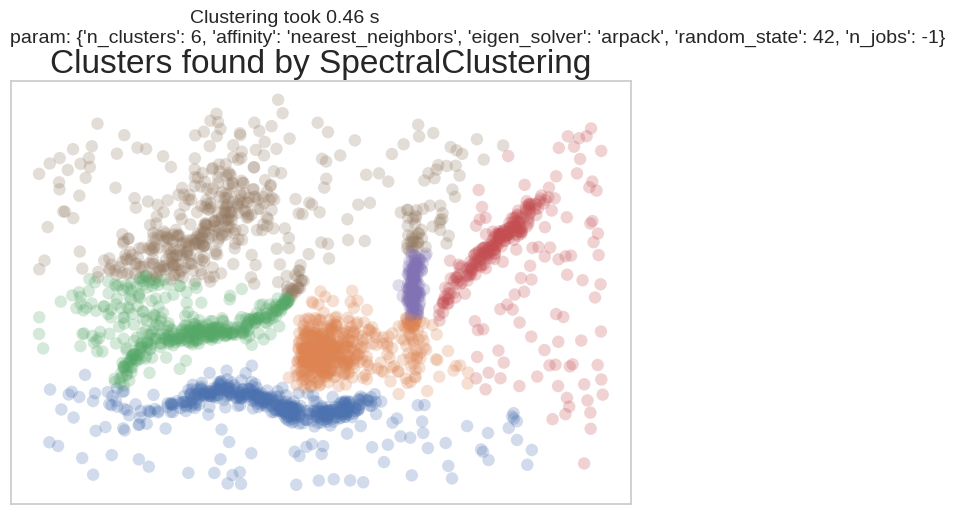

Running Spectral clustering with params: {'n_clusters': 6, 'affinity': 'rbf', 'eigen_solver': 'lobpcg', 'random_state': 42, 'n_jobs': -1}


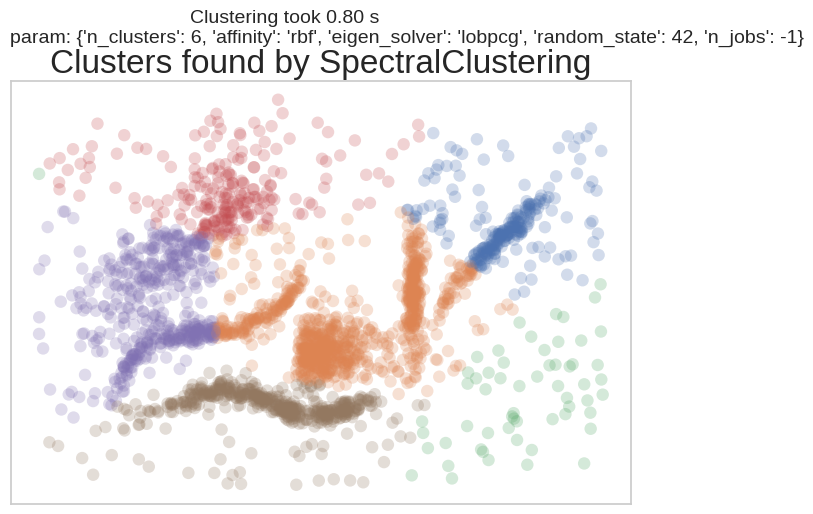

Running Spectral clustering with params: {'n_clusters': 6, 'affinity': 'rbf', 'eigen_solver': 'amg', 'random_state': 42, 'n_jobs': -1}


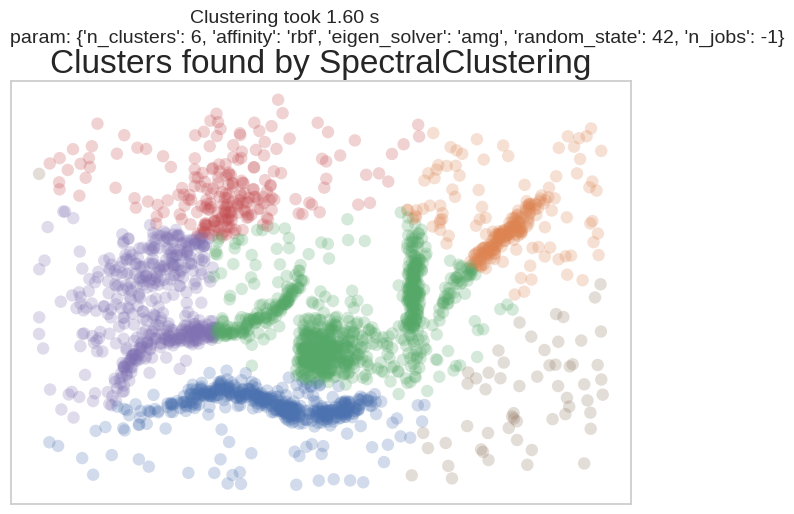

Running Spectral clustering with params: {'n_clusters': 6, 'affinity': 'nearest_neighbors', 'eigen_solver': 'arpack', 'random_state': 42, 'n_jobs': -1}


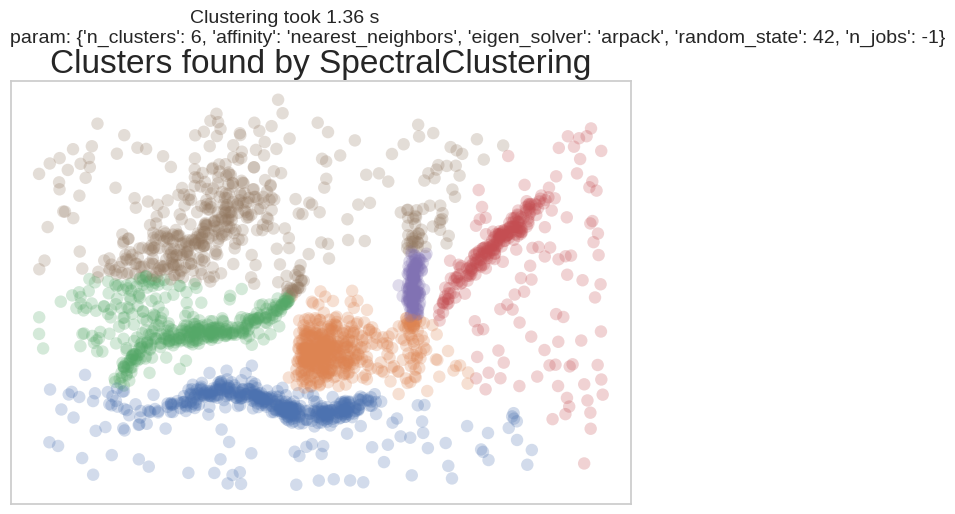

In [21]:
for spectral_params in spectral_params_list:
    print(f"Running Spectral clustering with params: {spectral_params}")
    plot_clusters_og(data, cluster.SpectralClustering, (), spectral_params)
    plt.show()

## 5.AgglomerativeClustering

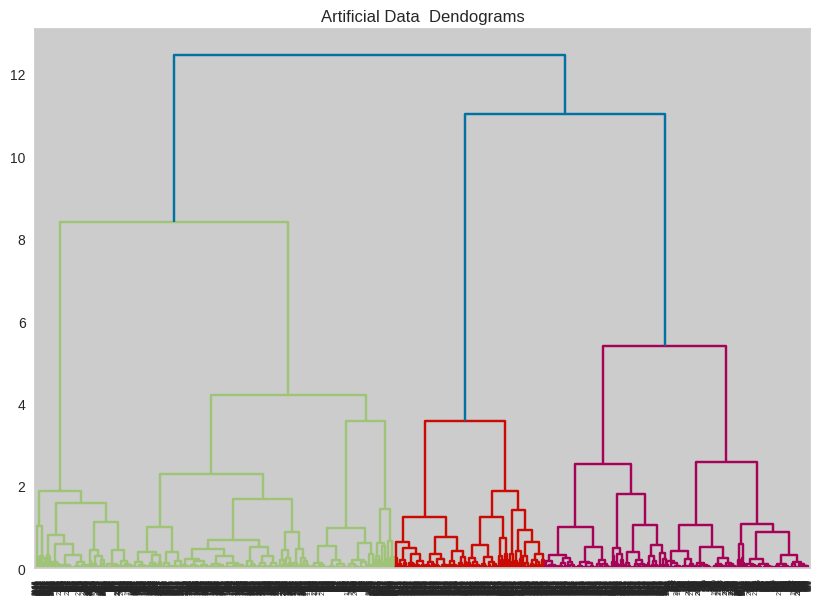

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc


# Creating a dendrogram using Ward linkage method
plt.figure(figsize=(10, 7))
plt.title("Artificial Data  Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))



In [23]:
agglomerative_params_list = [{'n_clusters': 6, 'metric': 'euclidean', 'linkage': 'ward'},
              {'n_clusters': 6, 'metric': 'euclidean', 'linkage': 'complete'},
              {'n_clusters': 6, 'metric': 'manhattan', 'linkage': 'average'},
              {'n_clusters': 6, 'metric': 'manhattan', 'linkage': 'complete'}]


Running Agglomerative clustering with params: {'n_clusters': 6, 'metric': 'euclidean', 'linkage': 'ward'}


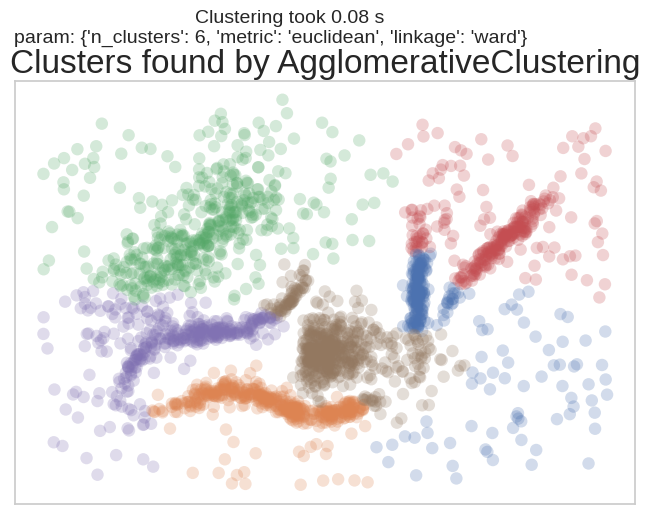

Running Agglomerative clustering with params: {'n_clusters': 6, 'metric': 'euclidean', 'linkage': 'complete'}


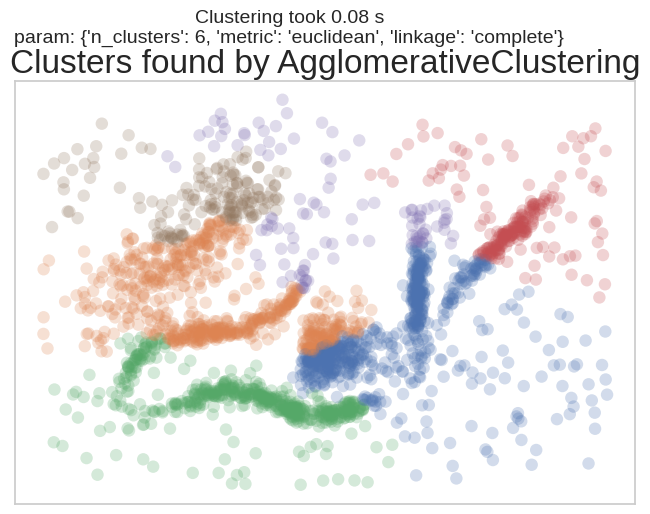

Running Agglomerative clustering with params: {'n_clusters': 6, 'metric': 'manhattan', 'linkage': 'average'}


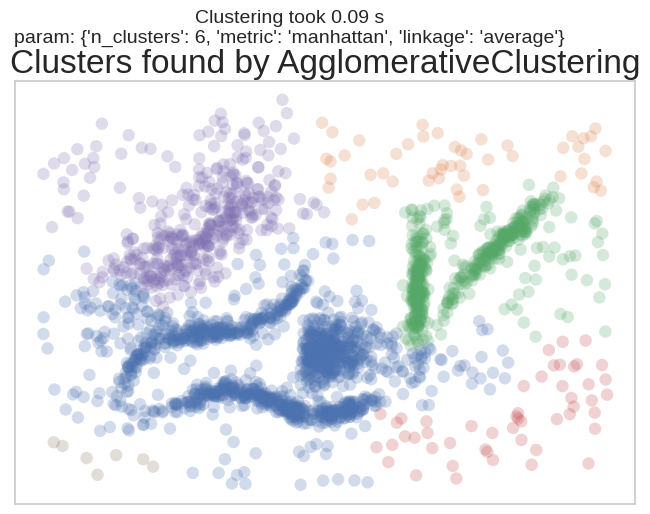

Running Agglomerative clustering with params: {'n_clusters': 6, 'metric': 'manhattan', 'linkage': 'complete'}


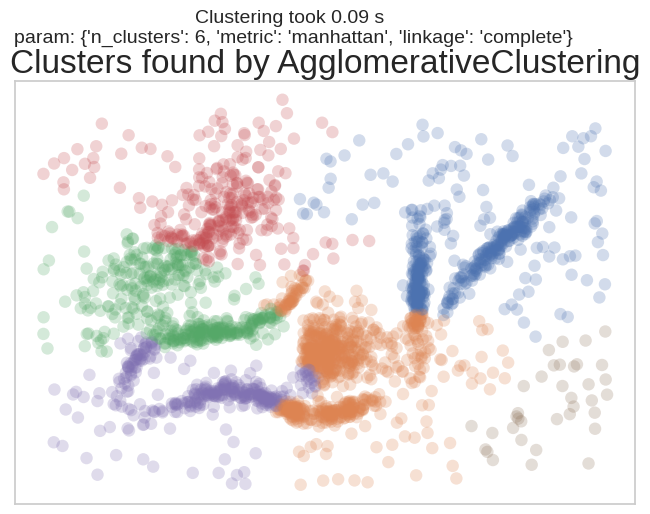

In [24]:
for agglomerative_params in agglomerative_params_list:
    print(f"Running Agglomerative clustering with params: {agglomerative_params}")
    plot_clusters_og(data, cluster.AgglomerativeClustering, (), agglomerative_params)
    plt.show()

## 6.Hdbscan

In [25]:
!pip install hdbscan


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 50.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3541978 sha256=5753de693cbfeef773200fe452d75d295c2f3c44198421591bc9b0f581b55e25
  Stored in directory: /root/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
Successfully built hdbscan


In [26]:
HBD_param_list = [
{'min_cluster_size': 50,},
{'min_cluster_size': 100},
{'min_cluster_size': 125},
{'min_cluster_size': 150}
]

Running HBDSCAN clustering with params: {'min_cluster_size': 50}


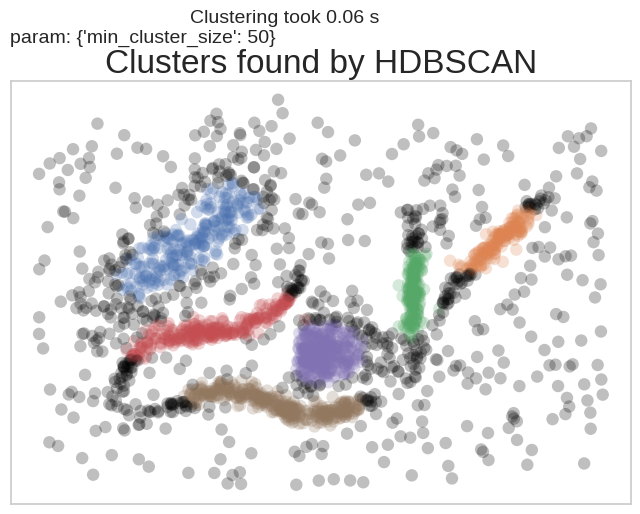

Running HBDSCAN clustering with params: {'min_cluster_size': 100}


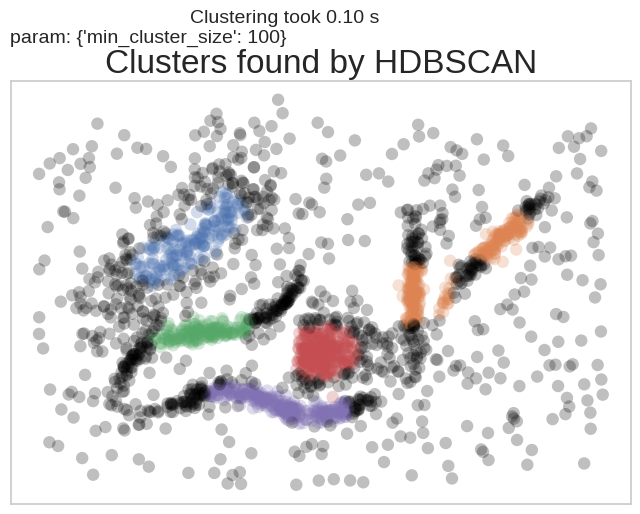

Running HBDSCAN clustering with params: {'min_cluster_size': 125}


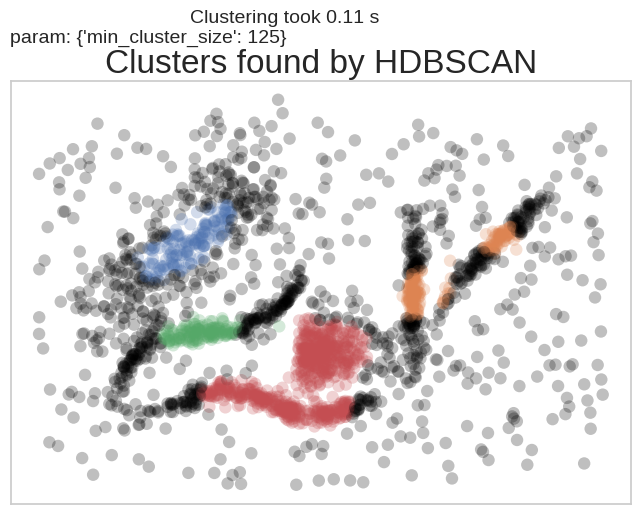

Running HBDSCAN clustering with params: {'min_cluster_size': 150}


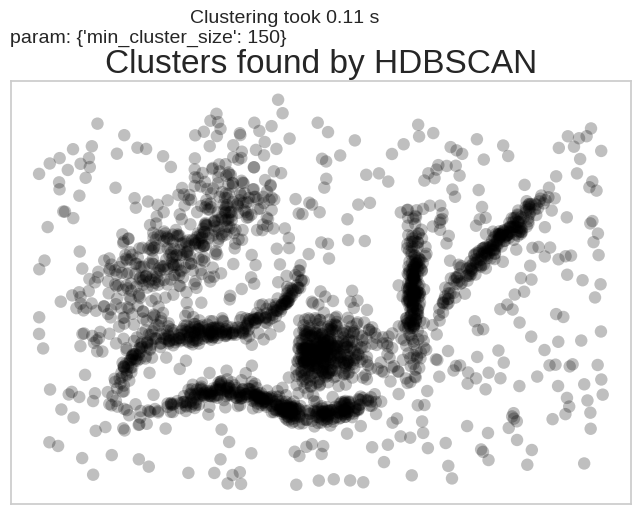

In [27]:
import hdbscan
for HBD_param in HBD_param_list:
  print(f"Running HBDSCAN clustering with params: {HBD_param}")
  plot_clusters_og(data, hdbscan.HDBSCAN, (), HBD_param)
  plt.show()